# Data Analysis on the Total Bike Flow on the Konstanz Bicycle Bridge and Bike-Involved Accidents

In this project, two related datasets have been acquired by the open data platform of Konstanz and built a data analysis upon them. In the website, a lot of firmly organized and have been served for the sake of people who may concern. However, on the one hand, the first dataset includes the detail about how many bikes flows through the bicycle bridge of Konstanz subject to the various attributes such as date, time, weather etc. and on the other hand, the other one involves traffic accidents recorded with several details like if a bike or motorbike has joined the accident or not, or exact location of the accident. Unfortunately, there was no data about the overall bike traffic in Konstanz. Therefore, I assumed that the total bike flow towards each side of the ‘’Fahrradbrücke’’ can be perfectly representative of the total bike flow in the city.

In this project score, only the data from 2020 have been used for analysis and prediction models. You can access both datasets through the links below:

Bike Usage Dataset: https://offenedaten-konstanz.de/dataset/fahrrad-dauerz-hlstellen/resource/c7da262a-7f4e-41a4-9a57-1d41222d77a4#{}

Zeit: Date (DD.MM.YYYY), Time (HH:MM)

Fahrradbruecke: Total number of cyclists (number)

Fahrradbruecke stadteinwaerts: Number of cyclists in the city (number) (left bank of the Rhine)

Fahrradbruecke stadtauswaerts: Number of cyclists out of town (number)

Symbol Wetter: Categorization Weather in Sunny, Partly cloudy, Cloudy, Overcast, Light fog, Occasional drizzle, Drizzle, Occasional 
light rainfall, Light shower, Scattered rainfall, Occasional thunderstorm and precipitation, Moderate rainfall, Partly moderate rainfall, Moderate to heavy rain shower

Temperatur (°C): Measured temperature at the measured time in degrees Celsius

Gefuehlte Temperatur (°C): Perceived ambient temperature that may differ from the measured air temperature due to various factors. It is a bioclimatic measure of thermal well-being. The perceived temperature measured according to the heat index at the measured time in degrees Celsius

Regen (mm): Precipitation at the time in millimeters

Traffic Accident Dataset: https://offenedaten-konstanz.de/dataset/stra-enverkehrsunf-lle/resource/ea89132c-c4f2-40e0-b276-37d2d955e7fa

UnfallID: unique number for each accident

Jahr-Monat: Year and month combined 2016-1

UJAHR: Accident year

UMONAT: Accident month

USTUNDE: Accident hour

UWOCHENTAG: Weekday (1 = Sunday 2 = Monday 3 = Tuesday 4 = Wednesday 5 = Thursday 6 = Friday 7 = Saturday)

UKATEGORIE: Accident categories (the criterion for classification is the most serious consequence of the accident) 1 = Accident with 
fatalities 2 = Accident with serious injuries 3 = Accident with minor injuries 

UART: Type of accident 1 = Collision with approaching/stopping/stationary vehicle 2 = Collision with vehicle in front/waiting 3 = Collision with vehicle moving sideways in the same direction 4 = Collision with oncoming vehicle 5 = Collision with turning/crossing vehicle 6 = Collision between vehicle and pedestrian 7 = Impact with road obstacle 8 = Departure from the road to the right 9 = Departure from the road to the left 0 = Accident of a different nature

UTYP1: Accident type 1 = Driving accident 2 = Turning accident 3 = Turning / crossing accident 4 = Exceeding accident 5 = Accident caused by stationary traffic 6 = Accident in longitudinal traffic 7 = Other accident

ULICHTVERH: Lighting conditions 0 = Daylight 1 = Twilight 2 = Darkness

IstRad: Accident in which at least one bicycle was involved 0 = Accident without bicycle involvement 1 = Accident with bicycle involvement

IstPKW: Accident in which at least one passenger car was involved 0 = accident without car involvement 1 = accident with car involvement

IstFuss: 0 = Accident without pedestrian involvement 1 = Accident involving pedestrians

IstKrad: Accident involving at least one motorcycle, such as moped, motorcycle/scooter 0 = Accident without motorcycle involvement 1 = Accident involving motorcycles

IstGkfz: Accident involving goods road vehicles (GKFZ): Accident involving at least one truck with a normal body and a total weight of more than 3.5 tonnes, a lorry with a tank or special body, a tractor unit or another tractor unit (this category is included in "Accident with others" in 2016 and 2017) 0 = Accident without the involvement of goods road vehicles 1 = Accident involving goods vehicles

IstSonstige: Accident with Other: Accident involving at least one of the above-mentioned means of transport, such as a bus or tram (2016 and 2017 inclusive) Accident with goods road vehicle (GKFZ), from 2018 without accident with GKFZ) 0 = Accident without the involvement of a means of transport not mentioned above 1 = Accident involving a means of transport not mentioned above

LINREFX and LINREFY: Graphic Coordinate 1 and Graphic Coordinate 2LINREFX and LINREFY form the coordinate of the accident site on the road section (UTM coordinate of the ETRS89 reference system, zone 32N). XGCSWGS84 and YGCSWGS84: Graphical Coordinate 1 and Graphic Coordinate 2 XGCSWGS84 and YGCSWGS84 form the coordinate of the accident location on the road section (Coordinate of the reference system GK 3)

The situation that I would like to delve into and the question were: What is the relationship between the total bike counts in the city and the the traffic accidents that involve bike?

# Install dependencies

In this project, Exctractl-Transform-Load (ETL)  phase has been done via pandas. And the data has been tranferred to sql through sqlite3 library. Scikit-learn and xgboost have been used for creating prediction models and seaborn library and graphviz has been used for the visualization of the analysis and the tree of the prediction model.

In [ ]:
%pip install pandas
%pip install seaborn 
%pip install 'SQLAlchemy==1.4.46'
%pip install -U scikit-learn
%pip install  xgboost
%pip install pysqlite3 
%pip install graphviz
%pip install plotly

# Load data

Thanks to a datapipeline that is developed, the datasets were pulled by a script ("data_pull.py") and loaded to the localhost with their names. Now we pull the data from the localhost through pandas.read_sql_table command.

In [1]:
import pandas as pd

name_db1="Zaehlstelle_Herose_2020_stuendlich_Wetter"
name_db2="Unfallatlas_Konstanz_Gesamt_2020"

df1 = pd.read_sql_table(name_db1, 'sqlite:///data.sqlite')
df2 = pd.read_sql_table(name_db2, 'sqlite:///data.sqlite')

## View of the databases

To ensure integrity between df1 (Total bike count dataset) and df2 (Accidents dataset), month, dayofweek and hour coulumns had to be dissected from the "Zeit" column of df1. With these columns, a unique key has been generated with an order (monat-wochentag-stunde) and has been used to merge the total bike count with the accident (at df2) in a specific time. In addition to dissecting dayofweek column from the "Zeit" column, an arrangement on the week days had to be done, because in df2,  weekdays in the following order: ( Sunday=1, Saturday=7) but in pandas it is in the mentioned order: (Monday=0, Sunday=6)

In [2]:
df1.head(3)

Zeit  Fahrradbruecke  Fahrradbruecke stadteinwaerts  \
0 2020-01-01 00:00:00           104.0                           31.0   
1 2020-01-01 01:00:00           128.0                           47.0   
2 2020-01-01 02:00:00           178.0                           77.0   

   Fahrradbruecke stadtauswaerts    Symbol Wetter  Temperatur (°C)  \
0                           73.0  Leicht bewoelkt              1.0   
1                           81.0  Leicht bewoelkt              0.0   
2                          101.0           Sonnig              0.0   

   Gefuehlte Temperatur (°C)  Regen (mm)  Monat  Wochentag  Stunde    Key  
0                       -1.0         0.0      1          4       0  1-4-0  
1                       -1.0         0.0      1          4       1  1-4-1  
2                       -2.0         0.0      1          4       2  1-4-2

In [3]:
df2.head(3)

UnfallID  UJAHR  UMONAT Jahr-Monat  UWOCHENTAG  USTUNDE  UKATEGORIE  UART  \
0  8,20E+18   2020       1 2020-01-01           6       14           2     9   
1  8,20E+18   2020       1 2020-01-01           6       12           3     5   
2  8,20E+18   2020       1 2020-01-01           5       15           3     0   

   UTYP1  ULICHTVERH  ...  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  \
0      1           0  ...       1        0        0        0            0   
1      3           0  ...       1        0        0        0            0   
2      7           0  ...       0        0        0        0            1   

       LINREFX      LINREFY    XGCSWGS84    YGCSWGS84     Key  
0  510512,2678  5287973,343  9,140234078  47,74504639  1-6-14  
1  512502,3037  5279837,487  9,166547759  47,67180763  1-6-12  
2  513454,3717  5279340,436  9,179215232  47,66731622  1-5-15  

[3 rows x 22 columns]

# How bike counts and traffic accident have changed subject to the date parameters (month, day of the week and hour of the day)?


C:\Temp\ipykernel_59756\2222509349.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_month=df1.groupby("Monat").mean()
C:\Temp\ipykernel_59756\2222509349.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_weekday=df1.groupby("Wochentag").mean()
C:\Temp\ipykernel_59756\2222509349.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_hour=df1.groupby("Stunde").mean()
No artists with lab

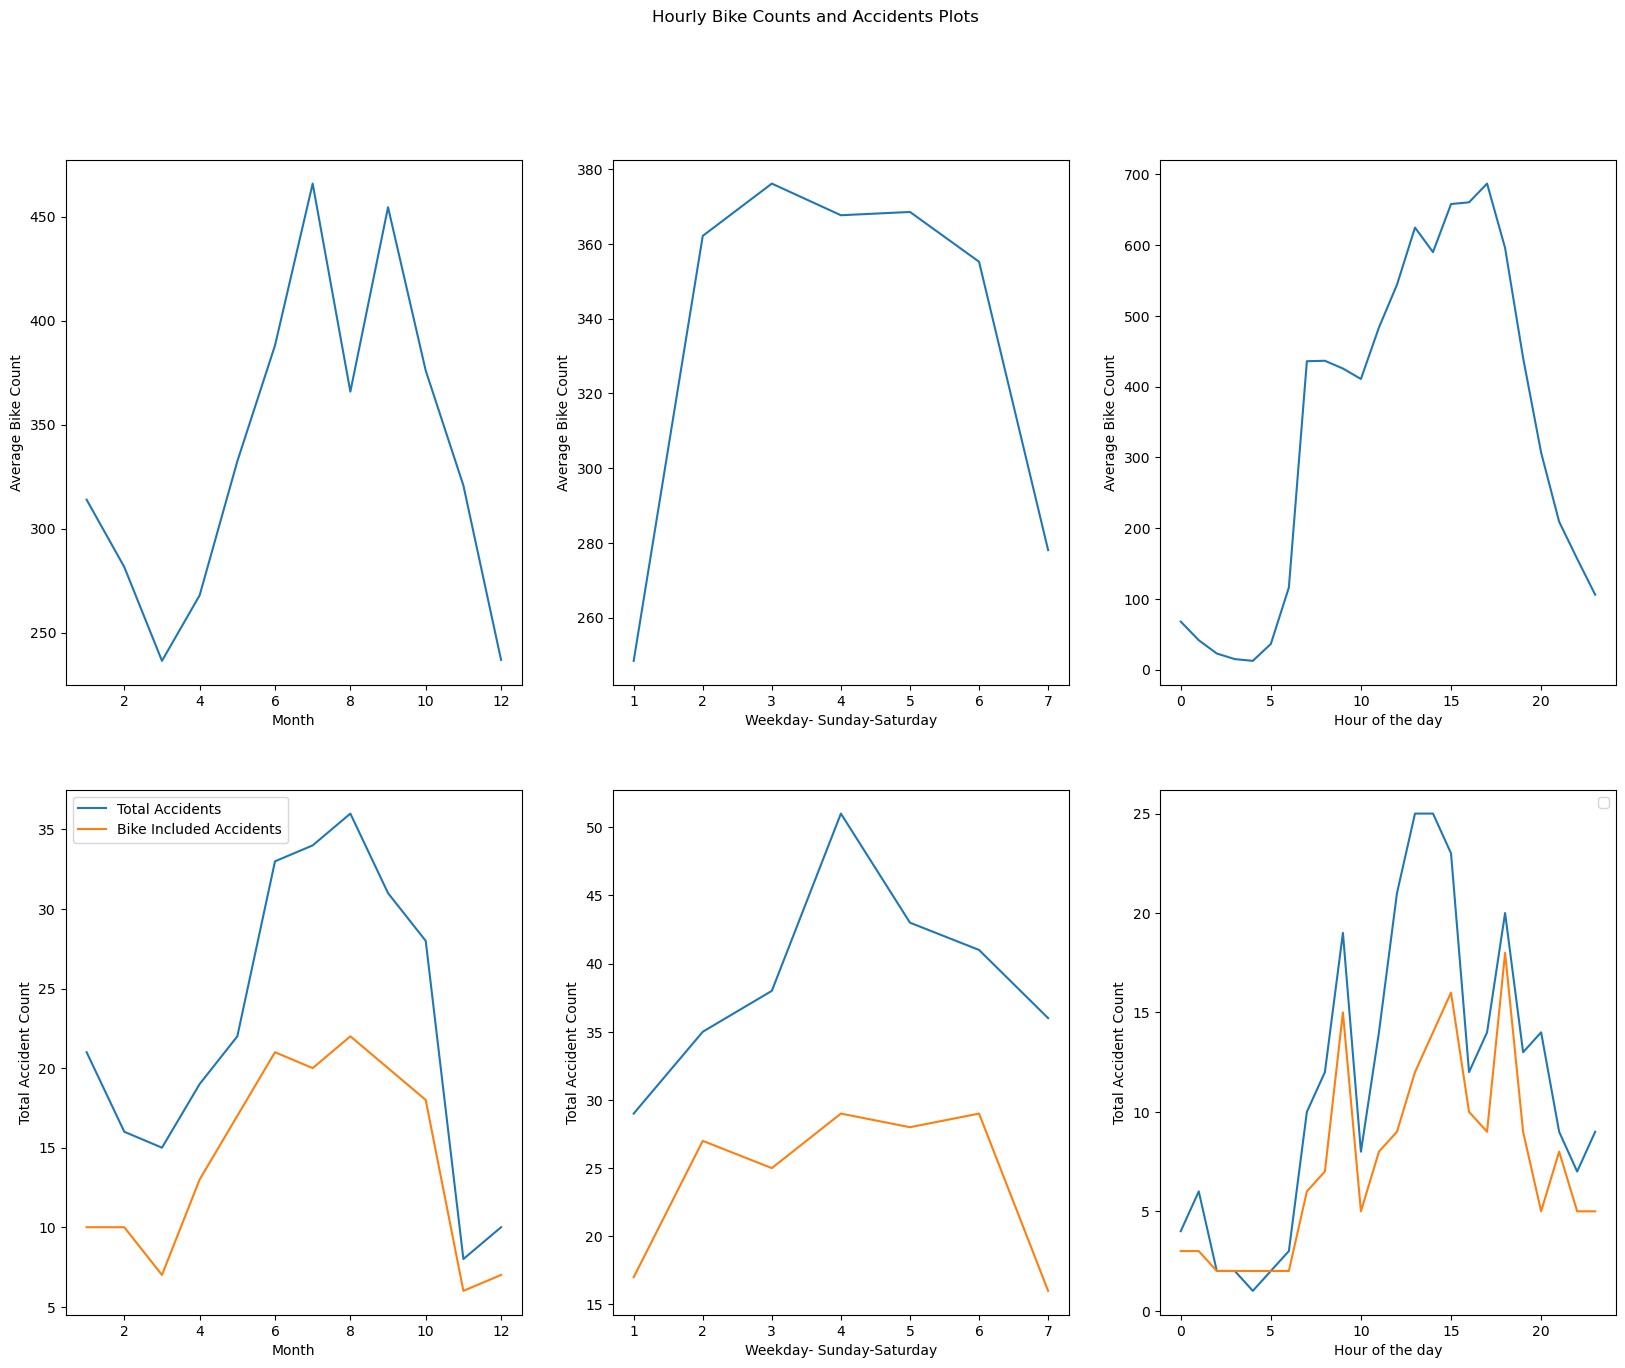

In [4]:
from matplotlib import pyplot as plt

df2_IstRad=df2.loc[df2["IstRad"]==1]

bike_count_month=df1.groupby("Monat").mean()
bike_count_weekday=df1.groupby("Wochentag").mean()
bike_count_hour=df1.groupby("Stunde").mean()

fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(
                                    ncols=3,
                                    nrows=2,
                                    figsize=(20, 15))
fig.suptitle('Hourly Bike Counts and Accidents Plots')
ax1.plot(bike_count_month["Fahrradbruecke"])
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Bike Count')
ax2.plot(bike_count_weekday["Fahrradbruecke"])
ax2.set_xlabel('Weekday- Sunday-Saturday')
ax2.set_ylabel('Average Bike Count')
ax3.plot(bike_count_hour["Fahrradbruecke"])
ax3.set_xlabel('Hour of the day')
ax3.set_ylabel('Average Bike Count')

accidents_month=df2.groupby("UMONAT")["UnfallID"].count()
accidents_weekday=df2.groupby("UWOCHENTAG")["UnfallID"].count()
accidents_hour=df2.groupby("USTUNDE")["UnfallID"].count()

accidents_month_IstRad=df2_IstRad.groupby("UMONAT")["UnfallID"].count()
accidents_weekday_IstRad=df2_IstRad.groupby("UWOCHENTAG")["UnfallID"].count()
accidents_hour_IstRad=df2_IstRad.groupby("USTUNDE")["UnfallID"].count()
ax4.plot(accidents_month,label="Total Accidents")
ax4.plot(accidents_month_IstRad,label="Bike Included Accidents")

ax4.legend()
ax4.set_xlabel('Month')
ax4.set_ylabel('Total Accident Count')
ax5.plot(accidents_weekday)
ax5.plot(accidents_weekday_IstRad)
ax5.set_xlabel('Weekday- Sunday-Saturday')
ax5.set_ylabel('Total Accident Count')
ax6.plot(accidents_hour)
ax6.plot(accidents_hour_IstRad)
ax6.set_xlabel('Hour of the day')
ax6.set_ylabel('Total Accident Count')

plt.legend()
plt.show()

Regarding monthly analysis, July (Month 8) has the highest accident counts, however, in the summer, the hourly bike count of July has the lowest value during the summer season. On the weekly scale, the bike usage and bike included accident counts on the weekdays are way bigger than at the weekends. Lastly, at the hourly scale, we see the most bike active hours between 15-17 PM, on the other hand, the bike-included accidents drastically happened at 9 AM, 15 PM and 18 PM. 

# Is there a meaningful relationship between bike-involved accidents and total bike counts on flow?

To visualize this comparison, I would like to use violin plot. The advantage of this plot, it shows, median, quartiles and data range as the boxplot does but additionally it also shows the data distribution. To analyze both data on the same plot, we have to merge the data with the key that we have generated.

C:\Temp\ipykernel_59756\2485433874.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_key=df1.groupby("Key").mean()


<AxesSubplot: xlabel='IstRad', ylabel='Fahrradbruecke'>

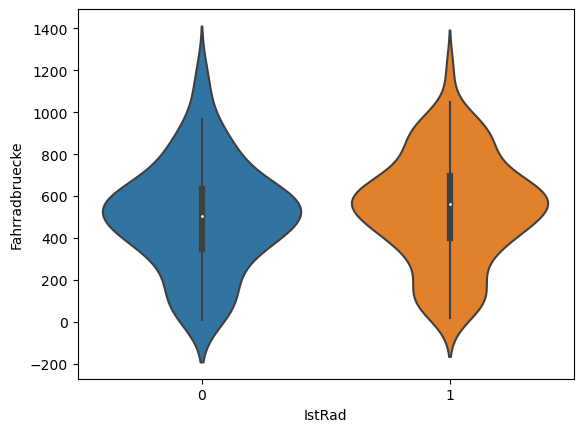

In [5]:
import seaborn as sns

df1_key=df1.groupby("Key").mean()

df1_df2_merged=pd.merge(df1_key, df2, on='Key')

sns.violinplot(y=df1_df2_merged["Fahrradbruecke"],x=df1_df2_merged["IstRad"])

As we have seen on the violin plot, the data has been filtered by bike inclusion status and this parameter has been used for comparison parameters at the x-axis. Unexpectedly, both data (bike-included accidents and not included accidents) show almost the same median and even more or less the same distribution regarding to the total bike count.

# What really affects the bike counts and traffic accidents?

We can start with a correlation analysis to see the big picture of the data. But we somehow have to include categorical features. There are several techniques to handle this situation. One of them is, that converts categorical values as binary columns, so-called one-hot encoding.

One thing to consider when working with one-hot encoding is that it can significantly increase the dimensionality of your dataset. To avoid computational issues, it's often a good idea to engage in detailed feature engineering to eliminate any unnecessary categorical columns. This is especially important for columns that contain a large number of values.



In [6]:
symbol_wetter_onehot=pd.get_dummies(df1["Symbol Wetter"], prefix='Symbol Wetter')


In [7]:
symbol_wetter_onehot.head(3)

Symbol Wetter_Bedeckt  Symbol Wetter_Bewoelkt  \
0                      0                       0   
1                      0                       0   
2                      0                       0   

   Symbol Wetter_Leicht bewoelkt  Symbol Wetter_Leichte Eisregen  \
0                              1                               0   
1                              1                               0   
2                              0                               0   

   Symbol Wetter_Leichte Schneeschauer  Symbol Wetter_Leichter Eisregen  \
0                                    0                                0   
1                                    0                                0   
2                                    0                                0   

   Symbol Wetter_Leichter Nebel  Symbol Wetter_Leichter Regenfall  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   

   Symbol Wetter_Leichter Regenschauer  Symbol Wetter_Leichter Schneefall  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   

   ...  Symbol Wetter_Stellenweise maeßiger Schneefall  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   

   Symbol Wetter_Stellenweise starker Schneefall  \
0                                              0   
1                                              0   
2                                              0   

   Symbol Wetter_Stellenweiser Eisregen  \
0                                     0   
1                                     0   
2                                     0   

   Symbol Wetter_Stellenweiser Nieselregen  \
0                                        0   
1                                        0   
2                                        0   

   Symbol Wetter_Stellenweiser Regenfall  \
0                                      0   
1                                      0   
2                                      0   

   Symbol Wetter_Stellenweiser Schneefall  \
0                                       0   
1                                       0   
2                                       0   

   Symbol Wetter_Stellenweiser leichter Regenfall  \
0                                               0   
1                                               0   
2                                               0   

   Symbol Wetter_Teilweise maeßiger Regenfall  \
0                                           0   
1                                           0   
2                                           0   

   Symbol Wetter_Teilweise starker Regenfall  \
0                                          0   
1                                          0   
2                                          0   

   Symbol Wetter_weather_condition_null  
0                                     0  
1                                     0  
2                                     0  

[3 rows x 38 columns]

## The weather type on the bike count

C:\Temp\ipykernel_59756\1843658359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_count_weather_type=df1.groupby("Symbol Wetter").mean()
C:\Temp\ipykernel_59756\1843658359.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_weather_max_min_merged=df1_max_weather_type.append(df1_min_weather_type)


Max. Weather Type:                           Fahrradbruecke
Symbol Wetter                           
Nieselregen mit Gewitter       574.25641
Min. Weather Type:                              Fahrradbruecke
Symbol Wetter                              
Teilweise starker Regenfall        9.666667


[Text(0, 0, 'Leicht bewoelkt'),
 Text(1, 0, 'Sonnig'),
 Text(2, 0, 'Bewoelkt'),
 Text(3, 0, 'Bedeckt'),
 Text(4, 0, 'Leichter Regenfall'),
 Text(5, 0, 'Nieselregen'),
 Text(6, 0, 'Stellenweiser Regenfall'),
 Text(7, 0, 'Maeßiger Regenfall'),
 Text(8, 0, 'Leichte Eisregen'),
 Text(9, 0, 'Leichter Schneefall'),
 Text(10, 0, 'Starker Schneefall'),
 Text(11, 0, 'Stellenweise starker Schneefall'),
 Text(12, 0, 'Leichte Schneeschauer'),
 Text(13, 0, 'Maeßige bis starke Schneefaelle'),
 Text(14, 0, 'Stellenweiser Nieselregen'),
 Text(15, 0, 'Maeßiger bis starker Regen mit Gewitter'),
 Text(16, 0, 'Maeßiger bis starker Eisregen'),
 Text(17, 0, 'Maeßiger bis starker Schneefall mit Gewitter'),
 Text(18, 0, 'Leichter Eisregen'),
 Text(19, 0, 'Leichter Regenschauer'),
 Text(20, 0, 'Stellenweiser leichter Regenfall'),
 Text(21, 0, 'Stellenweise Gewitter und Niederschlaege'),
 Text(22, 0, 'Stellenweiser Schneefall'),
 Text(23, 0, 'Starker Regenfall'),
 Text(24, 0, 'Teilweise maeßiger Regenfall'),
 T

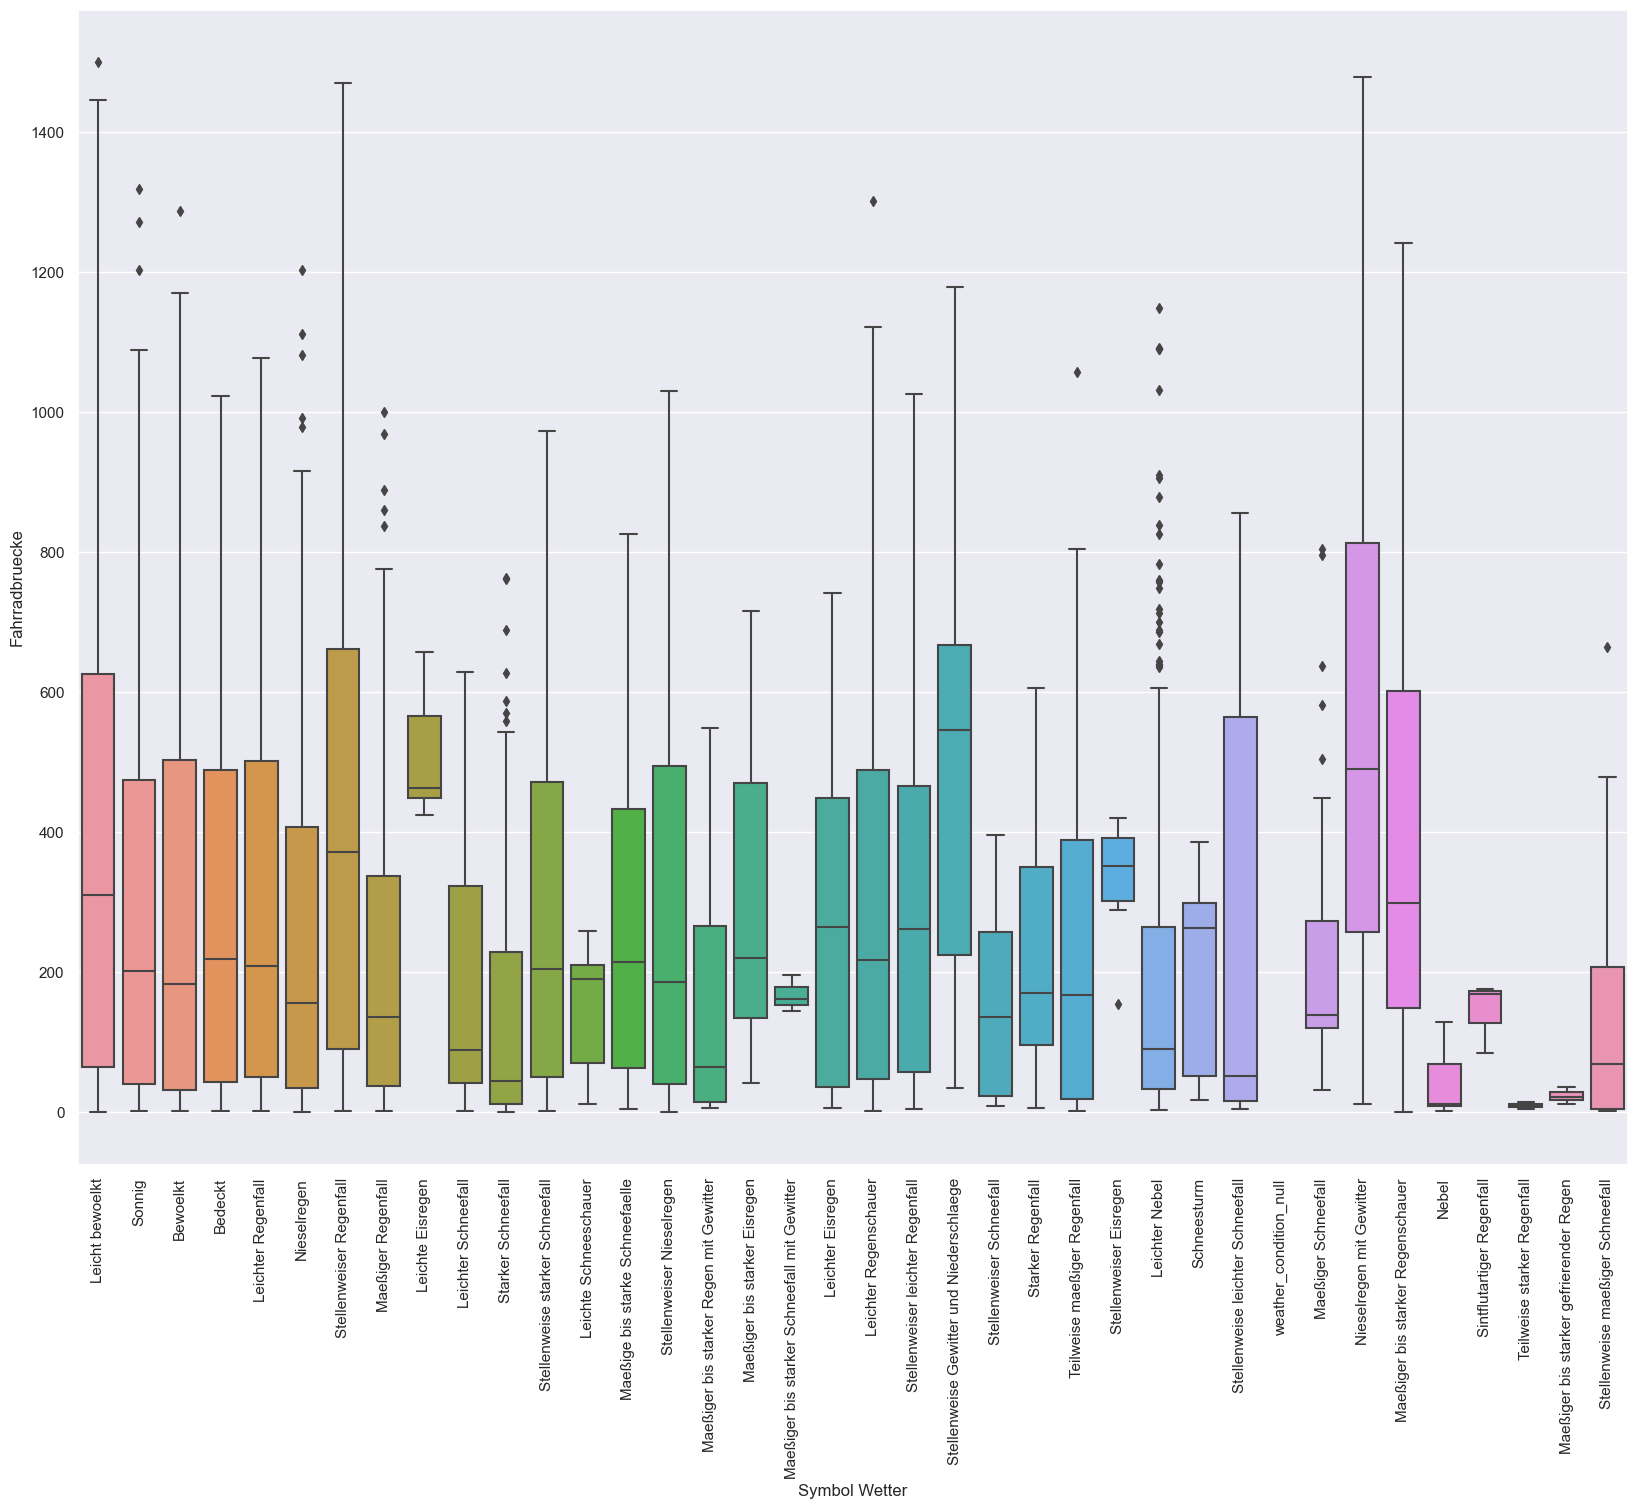

In [8]:
bike_count_weather_type=df1.groupby("Symbol Wetter").mean()

max_weather_type=bike_count_weather_type.loc[bike_count_weather_type["Fahrradbruecke"]==bike_count_weather_type["Fahrradbruecke"].max()]
min_weather_type=bike_count_weather_type.loc[bike_count_weather_type["Fahrradbruecke"]==bike_count_weather_type["Fahrradbruecke"].min()]

print("Max. Weather Type:",max_weather_type.drop(columns=["Fahrradbruecke stadteinwaerts", "Fahrradbruecke stadtauswaerts",	"Temperatur (°C)",	"Gefuehlte Temperatur (°C)",	"Regen (mm)", "Monat",	"Wochentag",	"Stunde"]))
print("Min. Weather Type:",min_weather_type.drop(columns=["Fahrradbruecke stadteinwaerts", "Fahrradbruecke stadtauswaerts",	"Temperatur (°C)",	"Gefuehlte Temperatur (°C)",	"Regen (mm)", "Monat",	"Wochentag",	"Stunde"]))

df1_max_weather_type=df1.loc[df1["Symbol Wetter"]=="Nieselregen mit Gewitter"]
df1_min_weather_type=df1.loc[df1["Symbol Wetter"]=="Teilweise starker Regenfall"]

df1_weather_max_min_merged=df1_max_weather_type.append(df1_min_weather_type)
sns.set(rc={'figure.figsize':(20,15)})

ax=sns.boxplot(data=df1_weather_max_min_merged, y=df1["Fahrradbruecke"], x=df1["Symbol Wetter"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Bike Count")


Interestingly "Nieselregen mit Gewitter" has the highest average bike count while the ‘Teilweise starker Regenfall’ leaded lowest. But what about the correlation of the weather types with the bike count?


C:\Temp\ipykernel_59756\4148315472.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0, 0.5, 'Correlation Coefficient')

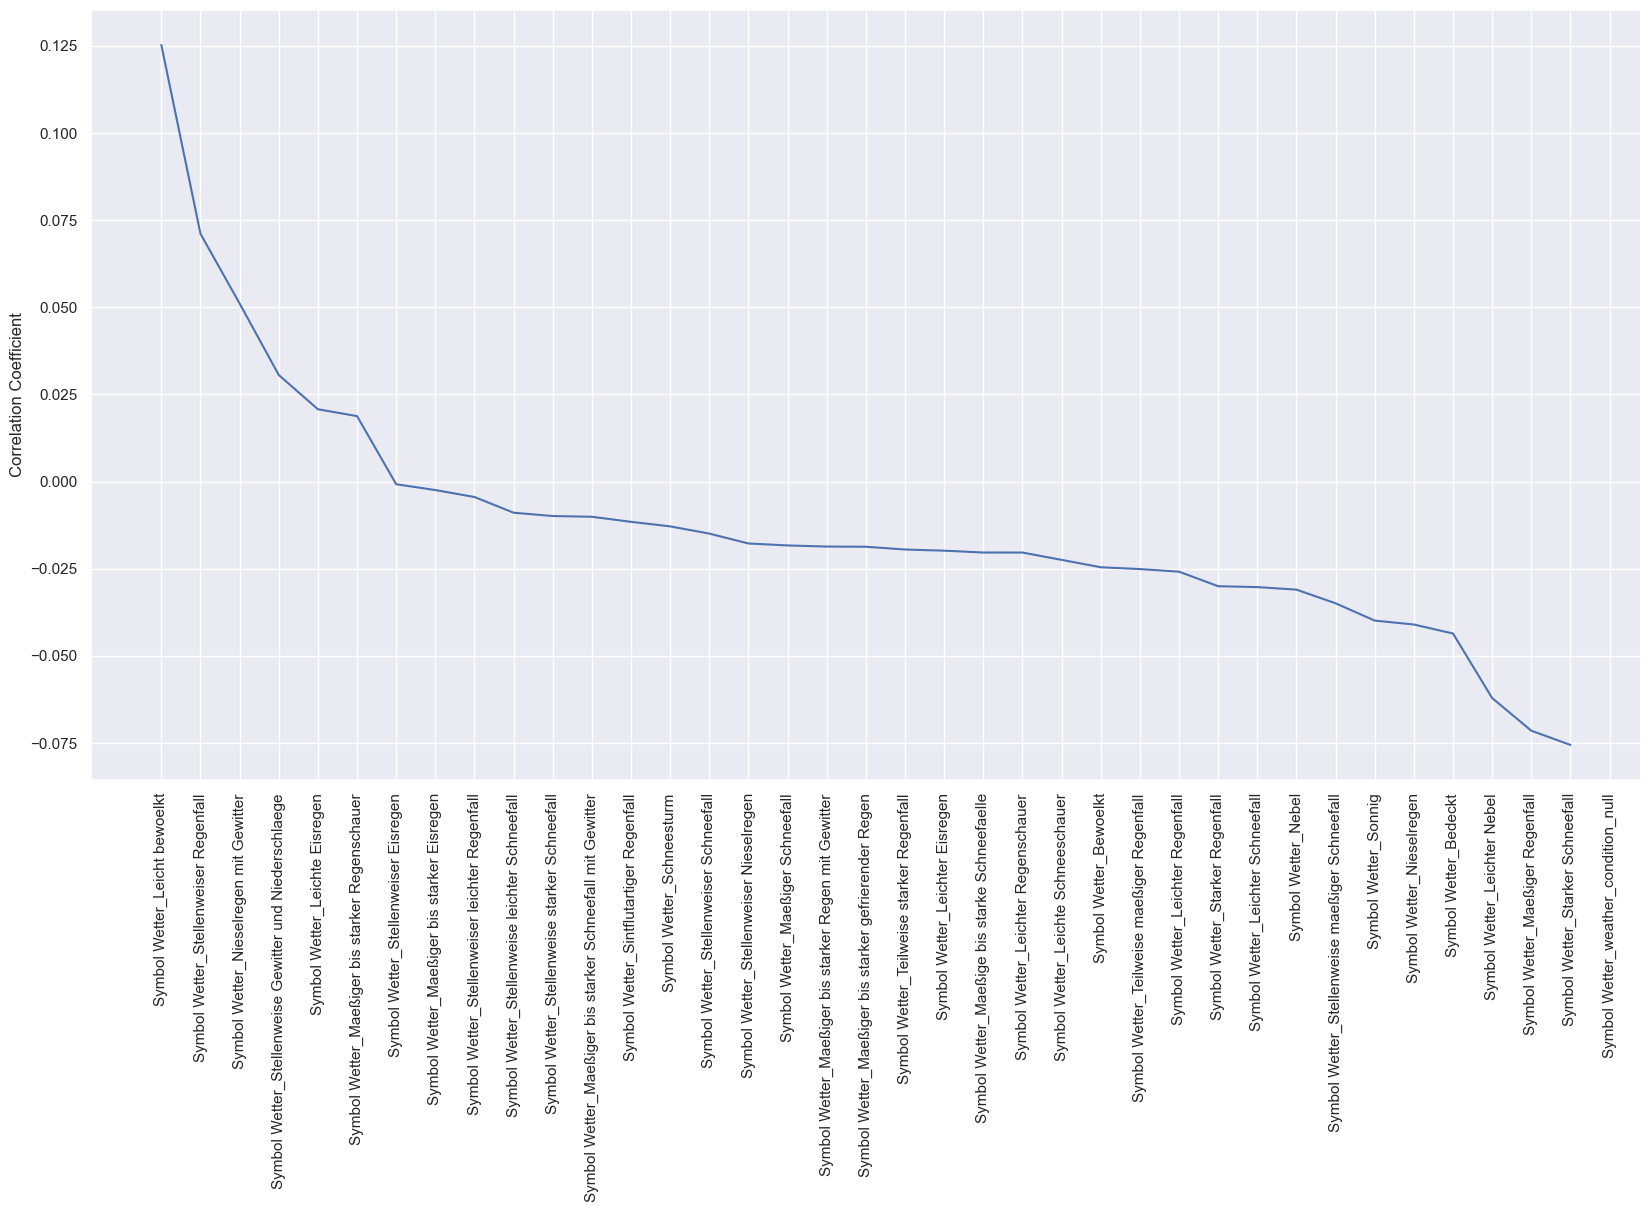

In [24]:
df1_symbol_wetter_embedded=pd.concat([df1["Fahrradbruecke"],symbol_wetter_onehot],axis=1)
sns.set (rc = {'figure.figsize':(20, 10)})
correlation = df1_symbol_wetter_embedded.corr()
ax=sns.lineplot(data=correlation['Fahrradbruecke'][1:].sort_values(ascending=False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax.set_ylabel("Correlation Coefficient")


So as we have seen on the map "Symbol Wetter" does not really affect the bike count. The highest correlation coefficient has been seen on the "Symbol Wetter_Leicht bewoelkt" : 0.125.

## The feeling temperature on the bike count


Slope: 29.651907659948954 Constant: 143.61512048774307


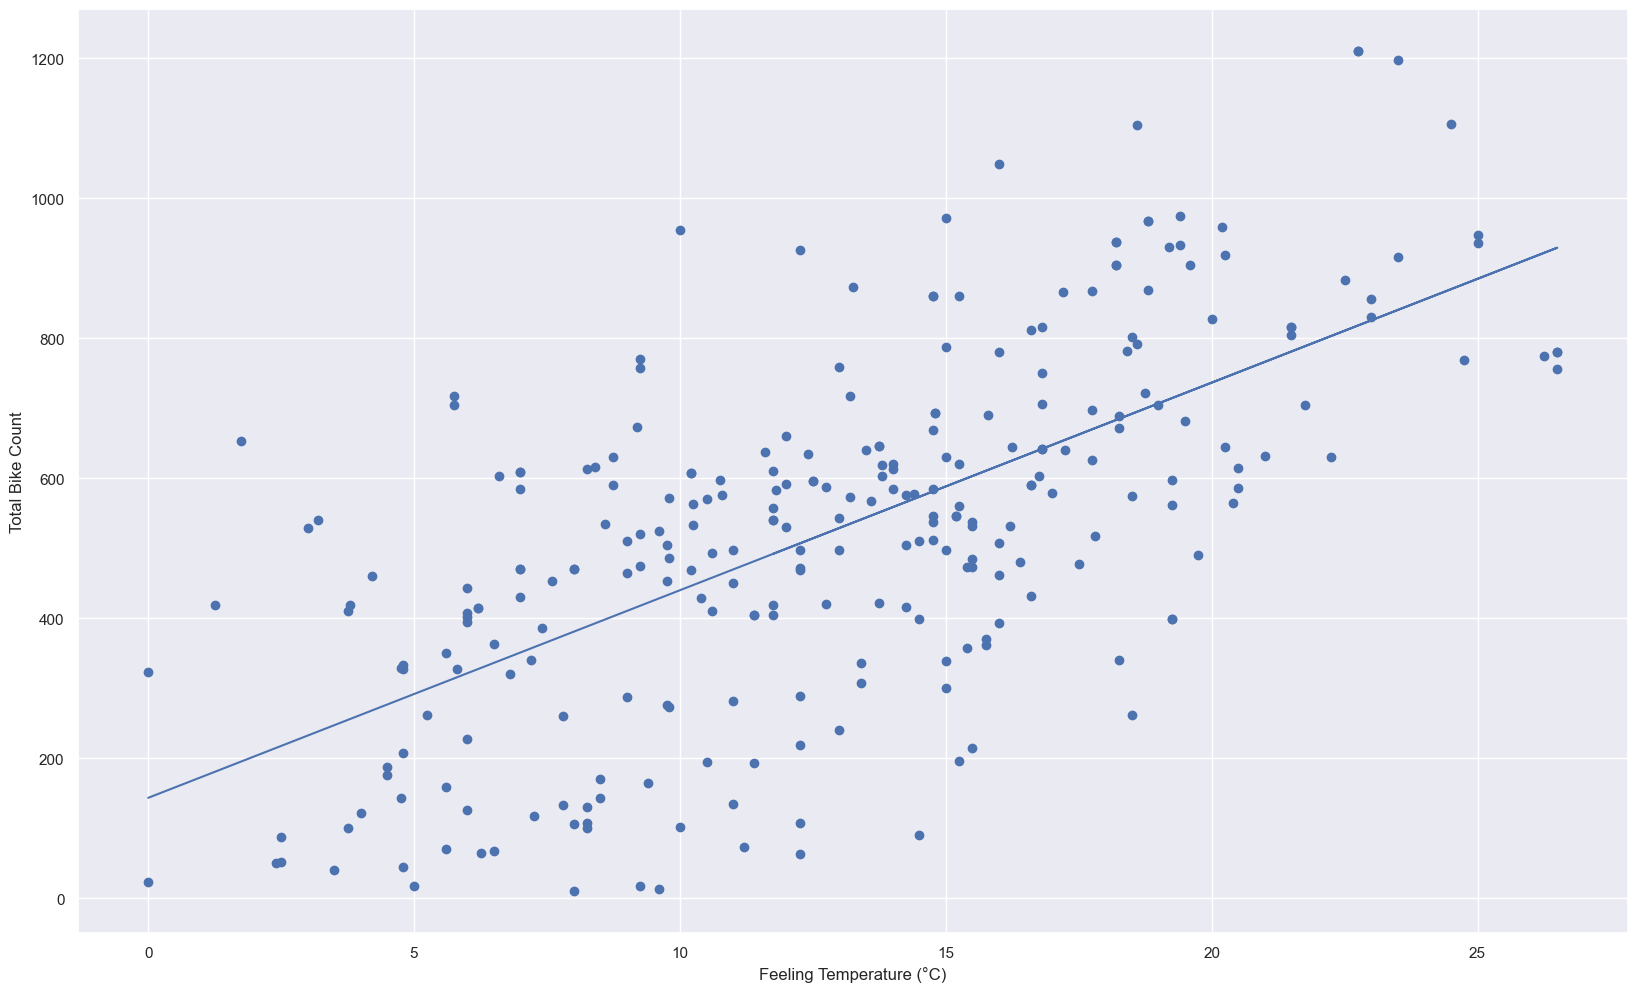

In [25]:
import numpy as np
x=df1_df2_merged["Gefuehlte Temperatur (°C)"]
y=df1_df2_merged["Fahrradbruecke"]
plt.figure(figsize=(20,12))
plt.xlabel("Feeling Temperature (°C)")
plt.ylabel("Total Bike Count")
plt.scatter(x,y)

# We can basically make a linear regression fit and visualize the positive trend.
m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x+b)

print("Slope:",m,"Constant:",b)

The weather temperature has a positive affect on the bike count. It may be a good predictior for the bike count. But further analysis is required.

## The categorical values on the traffic accidents

C:\Temp\ipykernel_59756\2185709877.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1_df2_merged_cor. corr ()


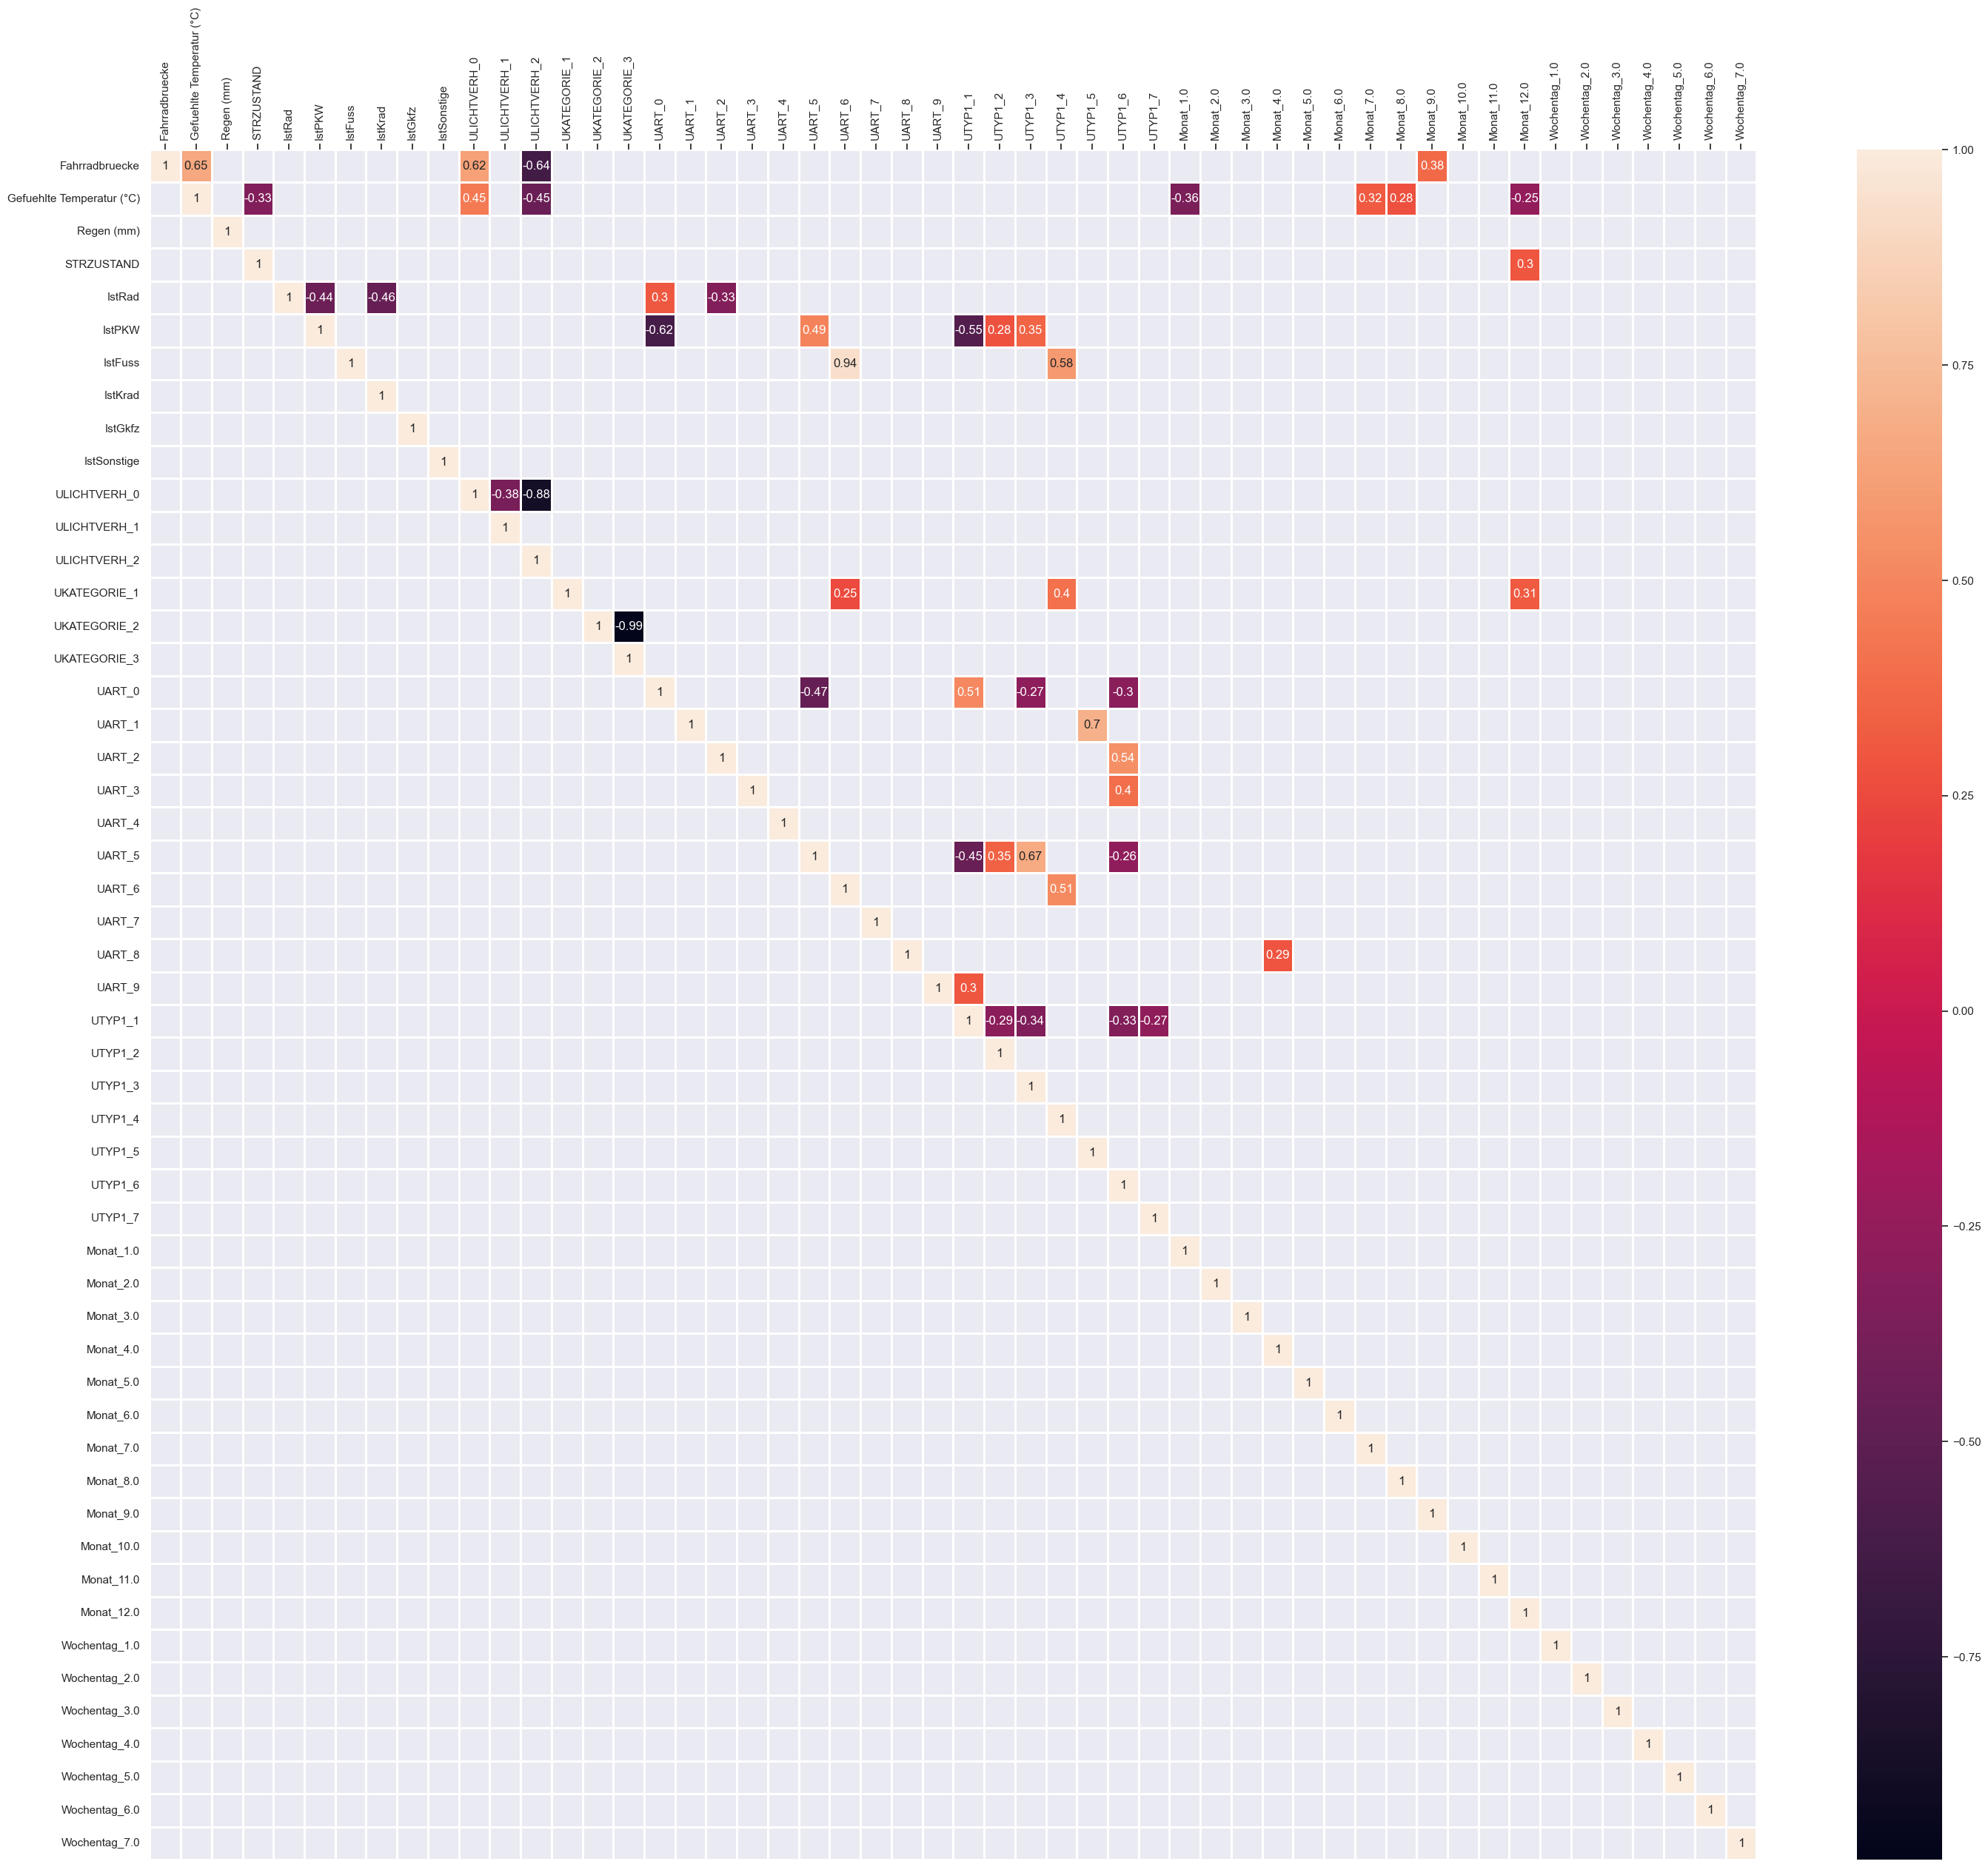

In [11]:
import numpy as np
ulichtverh_onehot=pd.get_dummies(df1_df2_merged["ULICHTVERH"], prefix='ULICHTVERH')
ukategorie_onehot=pd.get_dummies(df1_df2_merged["UKATEGORIE"], prefix='UKATEGORIE')
uart_onehot=pd.get_dummies(df1_df2_merged["UART"], prefix='UART')
utyp1_onehot=pd.get_dummies(df1_df2_merged["UTYP1"], prefix='UTYP1')
monat_onehot=pd.get_dummies(df1_df2_merged["Monat"], prefix='Monat')
wochentag_onehot=pd.get_dummies(df1_df2_merged["Wochentag"], prefix='Wochentag')

df1_df2_merged_onehot_embedded=pd.concat([df1_df2_merged,ulichtverh_onehot,ukategorie_onehot,uart_onehot,utyp1_onehot,monat_onehot,wochentag_onehot],axis=1)

sns.set (rc = {'figure.figsize':(35, 30)})
df1_df2_merged_cor=df1_df2_merged_onehot_embedded.drop(['UMONAT',"UJAHR","UWOCHENTAG","USTUNDE","ULICHTVERH",'UKATEGORIE','UART','UTYP1',"Stunde","Monat","Wochentag","Temperatur (°C)","Fahrradbruecke stadtauswaerts","Fahrradbruecke stadteinwaerts"], axis=1)
correlation = df1_df2_merged_cor. corr ()  
matrix = np.triu(correlation)

ax=sns. heatmap (correlation,annot=True,mask=(np.abs(matrix) <= 0.25),linewidths=2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top')

As we see on the correlation matrix demonstrated, lighting condition "ULICHTVERH" especially 0 and 2 seem quite important effects on the bike count but not on the accidents the bike involved "IstRad". However, "IstPKW" and "IstKrad" has prominent importance comparatively the other parameters. Also on the matrix, the notable effect of the feeling temperature depicted, so we can say that it is a potential feature for predicting bike count. 

Correlation matrix were masked by the greater absolute .25 correlation coefficient.

# What would be the best prediction tool to predict bike counts and bike involved-traffic accidents?

## Is linear regression is a good tool to predict total bike count?

To check that we can compare the two prediction methods by a quality metric such as MSE.

And we will select two methods:
- Linear regression
- XGBoost Regressor

Feeling temperature was used for linear regression feature.

In [13]:
feature_columns=["Gefuehlte Temperatur (°C)"]
x=df1_df2_merged_onehot_embedded[feature_columns]
y=df1_df2_merged_onehot_embedded["Fahrradbruecke"]

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn import metrics

def regressor_compare(x,y):

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



    linreg=LinearRegression()

    linreg.fit(x_train,y_train)

    y_pred=linreg.predict(x_test)

    MSE_LinReg=metrics.mean_squared_error(y_test,y_pred)

    #MSE of LinearRegression
    #print("MSE of LinearRegression: ",metrics.mean_squared_error(y_test,y_pred))



    xgb_r = xg.XGBRegressor(objective ='reg:linear',
                    n_estimators = 10, seed = 123)
    
    xgb_r.fit(x_train, y_train)
    
    y_pred = xgb_r.predict(x_test)
    MSE_XGReg=metrics.mean_squared_error(y_test,y_pred)

    #print("MSE of XGBoostRegressor: ",metrics.mean_squared_error(y_test,y_pred))

    return MSE_LinReg,MSE_XGReg





With the help of this function, we can compare the two regressor.

In [ ]:

mse_list=[]
regressor_list=[]
for i in range(1000):
    MSE_LinReg,MSE_XGReg=regressor_compare(x,y)
    mse_list.append(MSE_LinReg)
    regressor_list.append("Sklearn.LinReg")
    mse_list.append(MSE_XGReg)
    regressor_list.append("XGB.Regressor")


result = {'MSE': mse_list, 'Regressor': regressor_list}
df_MSE = pd.DataFrame(data=result)   


<AxesSubplot: xlabel='Regressor', ylabel='MSE'>

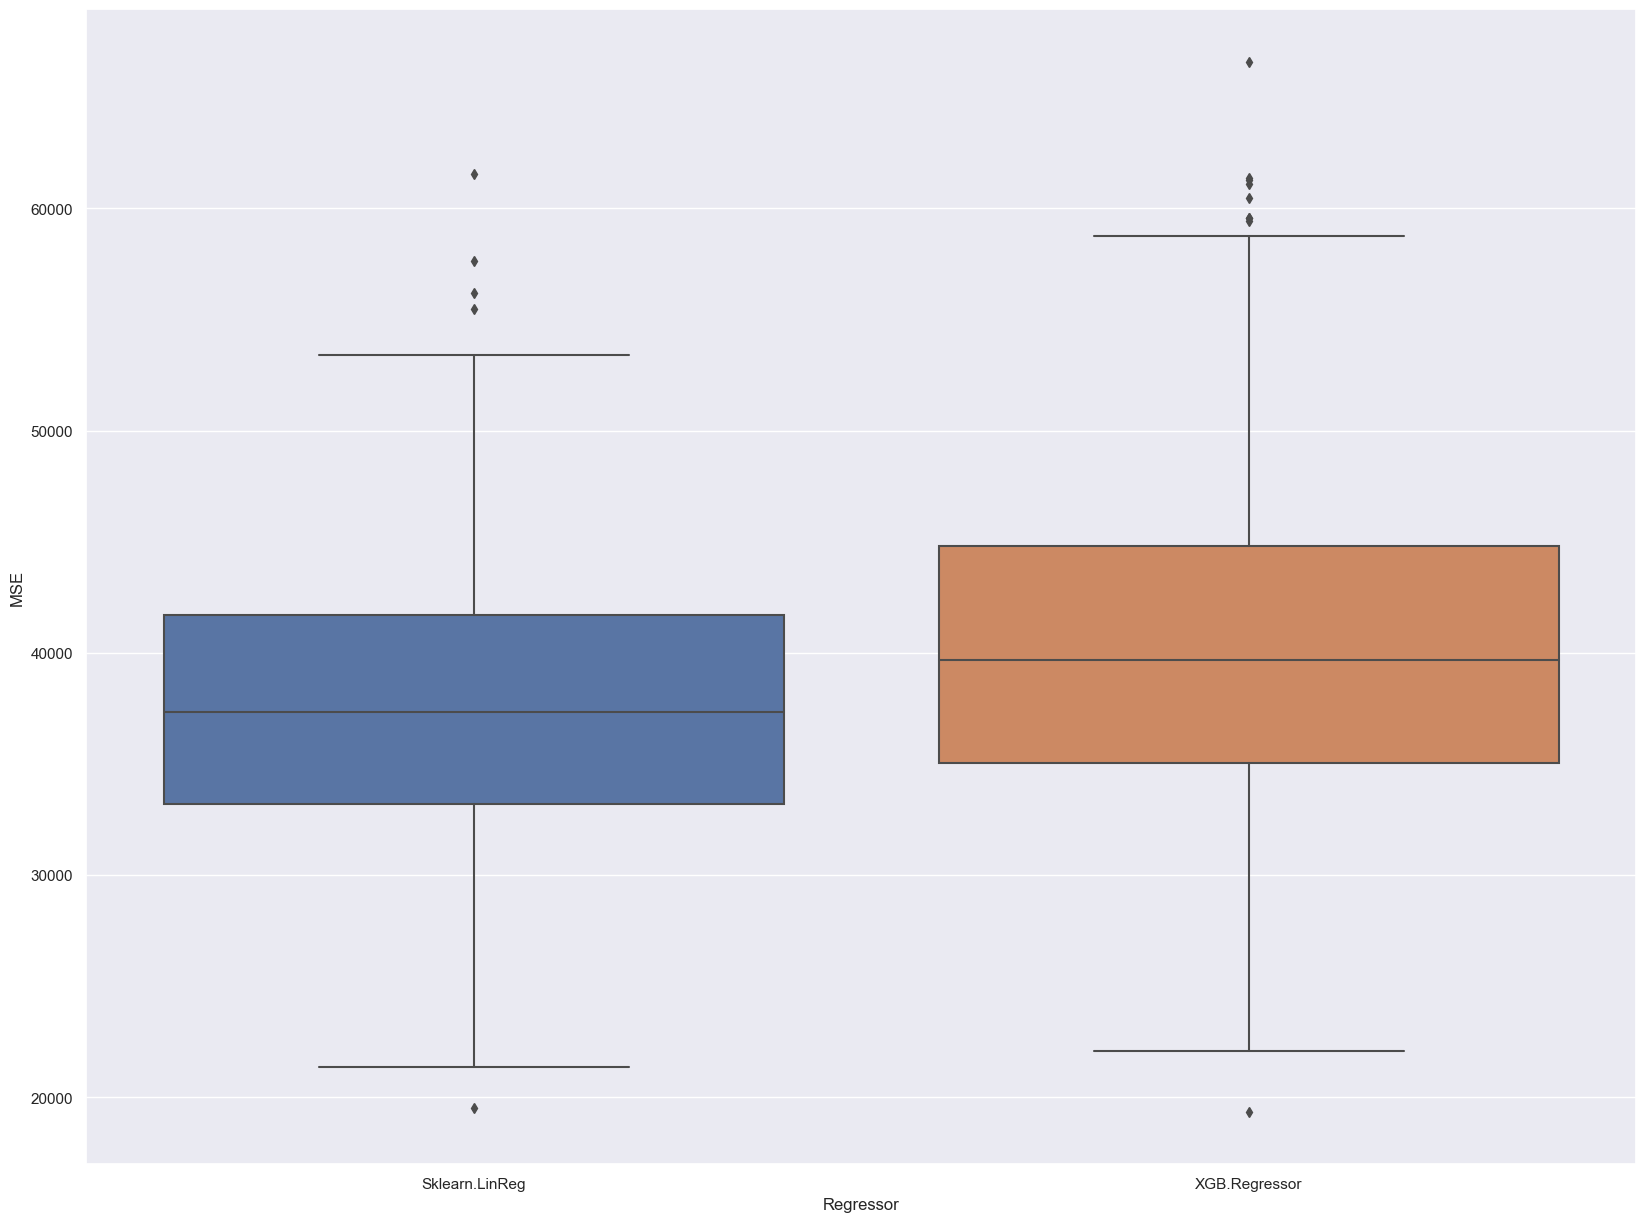

In [15]:
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data=df_MSE, y=df_MSE["MSE"], x=df_MSE["Regressor"])

Both models were run 1000 times with the same dataset and the MSE results have been listed. And it clearly seen that MSE value of sklearn.linreg slightly surpassed the Xgb.regressor for the prediction of the total bike count subject to the feeling temperature. In addition to this, it is a way better approach in terms of explainability which can be extremely important such cases in health and banking.

## How well IstRad can be predicted with the specific features?

XGBoost has pretty positive acknowledgement in data science especially for classification tasks. Therefore we will use XGBoost classifier as a prediction model.We will build the model under two different approach and compare the prediction accuracy:

- With all features
- Only selected features ['IstKrad','UART_0','UART_2','IstPKW']

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data=df1_df2_merged_cor.drop(columns=["LINREFX","LINREFY","XGCSWGS84","YGCSWGS84","UnfallID","Key",'Jahr-Monat'])

def first_scenario(data):
    #First scenario
    param="IstRad"

    y=data[param]
    x=data.drop(param,axis=1)

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model = XGBClassifier()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions = [round(value) for value in y_pred]

    accuracy_1 = accuracy_score(y_test, predictions)
    #print("Accuracy of the first scenario (With all meaningful features): %.2f%%" % (accuracy_1 * 100.0))
    return accuracy_1,model
def second_scenario(data):
    # Second scenario
    param="IstRad"
    feature_columns=['IstKrad','UART_0','UART_2','IstPKW']
    y=data[param]
    x=data[feature_columns]

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model = XGBClassifier()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    predictions = [round(value) for value in y_pred]

    accuracy_2= accuracy_score(y_test, predictions)
    #print("Accuracy of the second scenario (Only four selected features): %.2f%%" % (accuracy_2 * 100.0))

    return accuracy_2,model





Two scenarios can lead different results at the every run because of the randomization at the data splitting phase. To decide which scenario is better we run both scenarios and collect MSE values of each and plot them on boxplot.

### Which scenario is way better when the randomization on the dataset is considered?

In [18]:

accuracy_list=[]
scenario_list=[]
for i in range(1000):
    accuracy_1,_=first_scenario(data)
    accuracy_2,_=second_scenario(data)
    accuracy_list.append(accuracy_1)
    scenario_list.append("Scenario 1")
    accuracy_list.append(accuracy_2)
    scenario_list.append("Scenario 2")

result = {'Accuracy': accuracy_list, 'Scenario': scenario_list}
df_accuracy = pd.DataFrame(data=result)

<AxesSubplot: xlabel='Scenario', ylabel='Accuracy'>

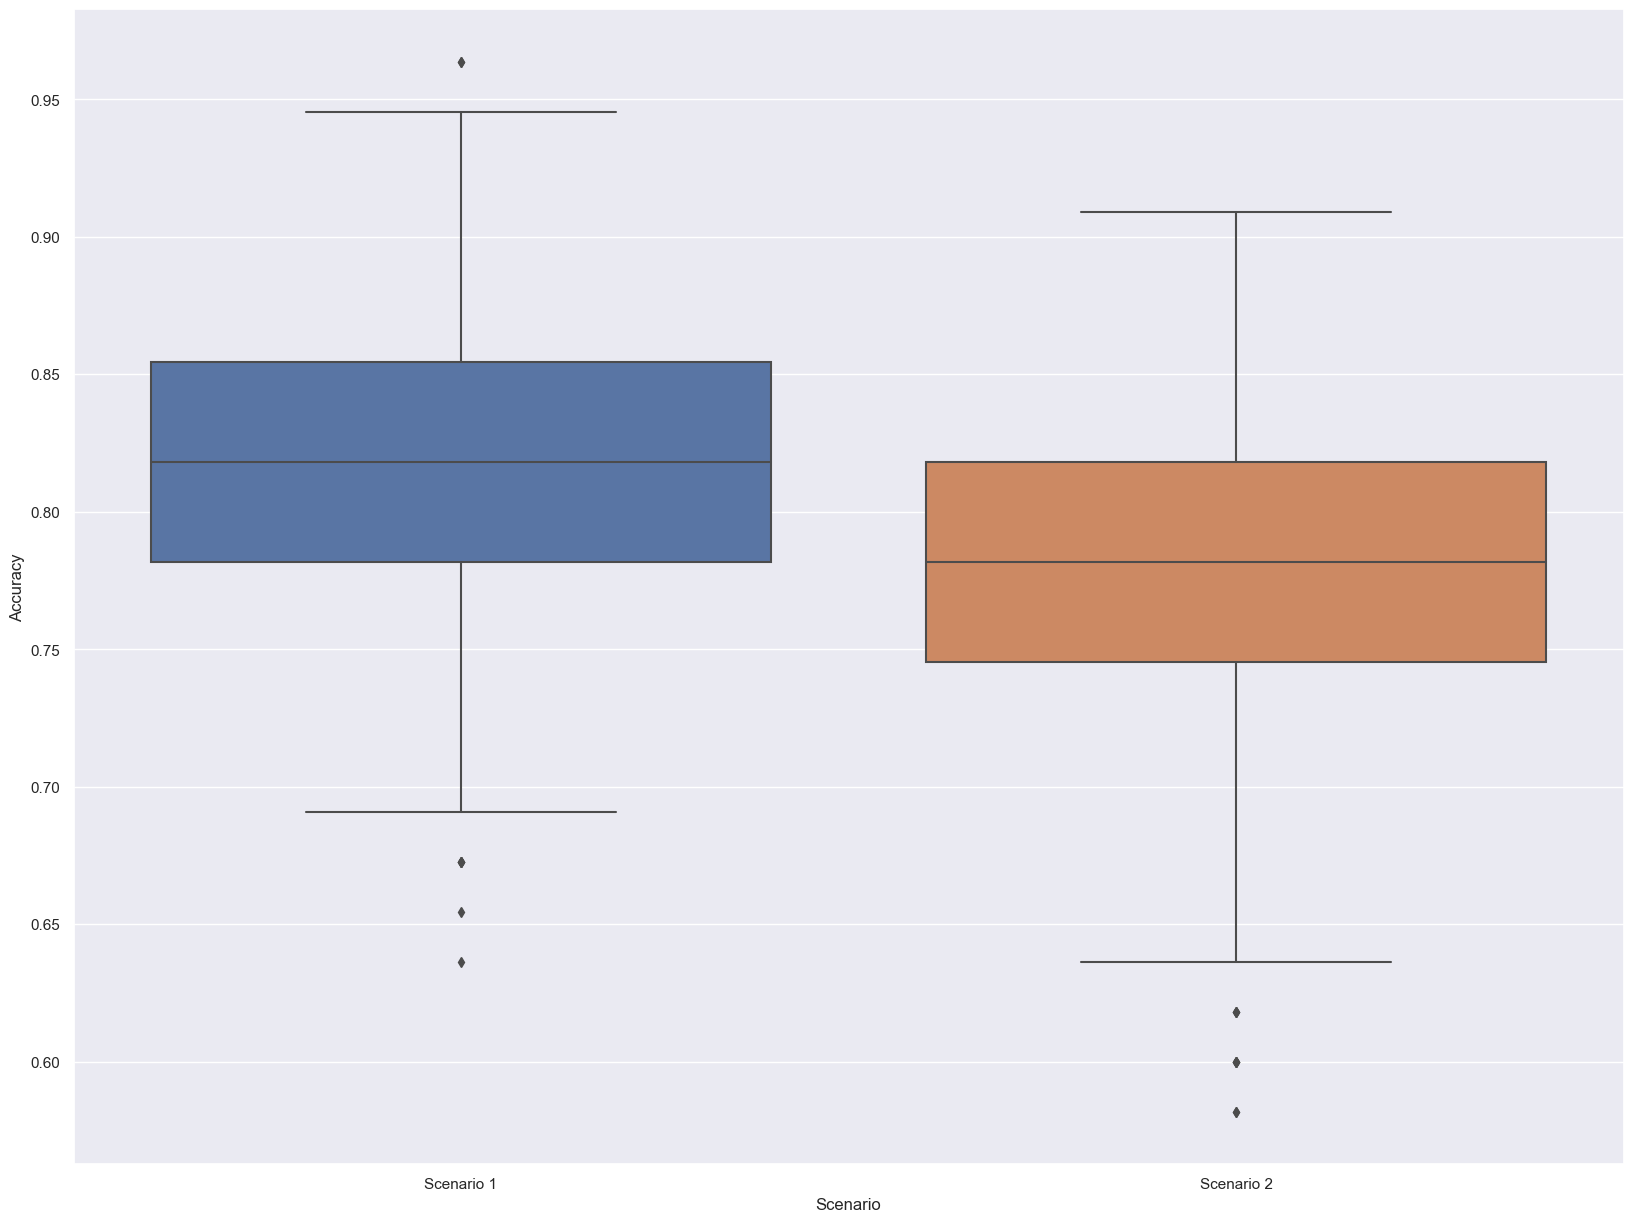

In [19]:
sns.boxplot(data=df_accuracy, y=df_accuracy["Accuracy"], x=df_accuracy["Scenario"])

As the boxplot demonstrated Scenario 1 has almost 4% higher accuracy than Scenario 2 (in median). So we can conclude that for predicting the "IstRad" value, four features can give promising results but with all meaningful features, we can get better results in spite correlation matrix showing most of them as an uncorrelated feature. However, we should suffer from the training time for the first scenario.

Accuracy: 85.45%


<AxesSubplot: >

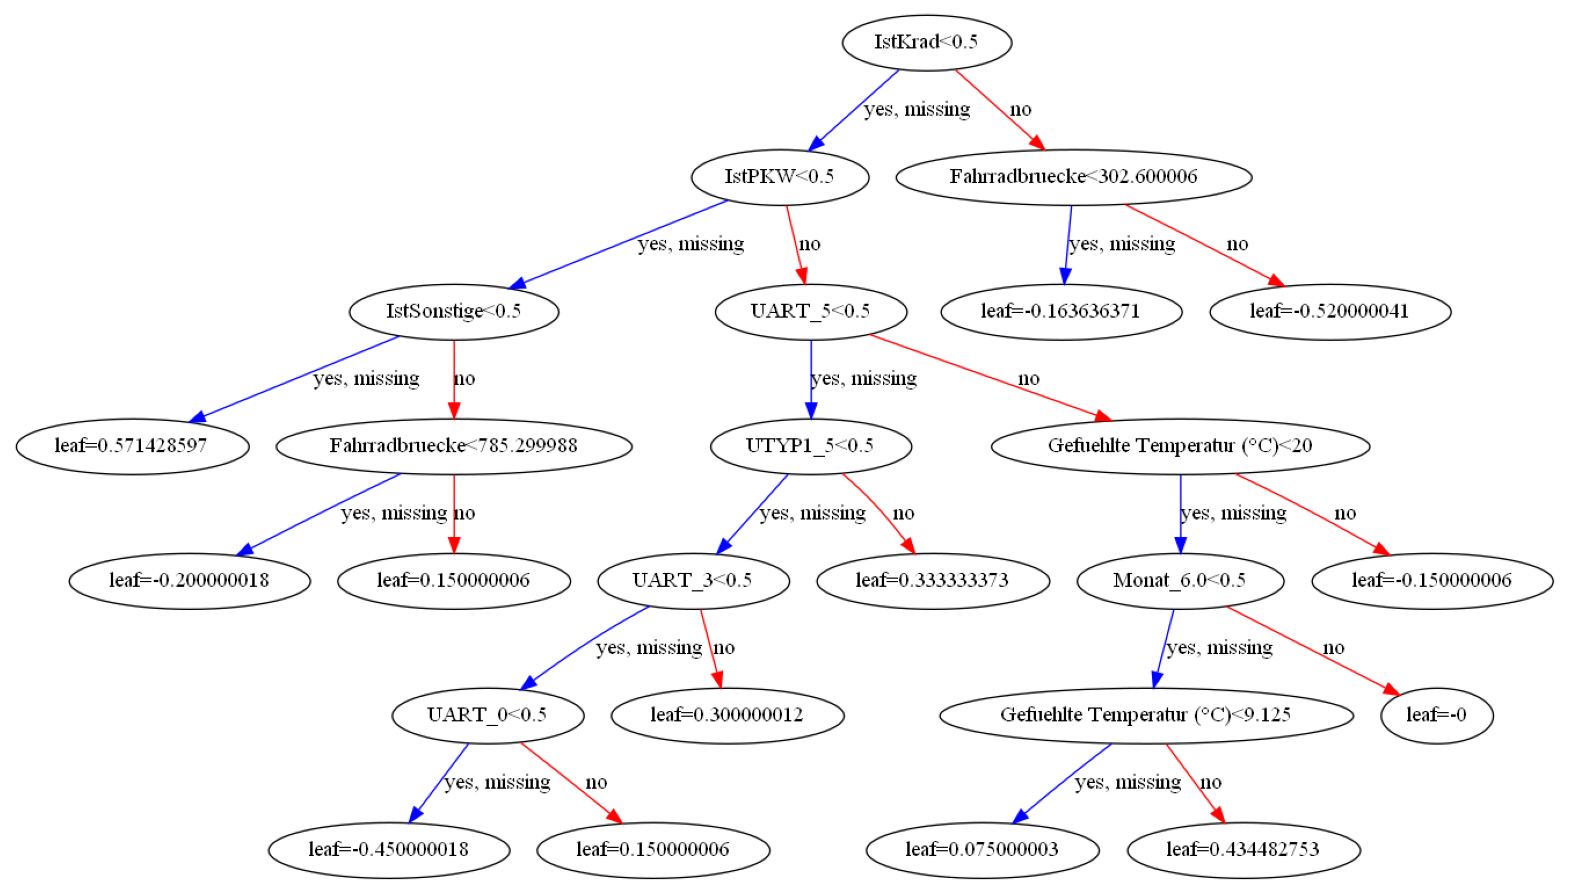

In [21]:
from xgboost import plot_tree
data=df1_df2_merged_cor.drop(columns=["LINREFX","LINREFY","XGCSWGS84","YGCSWGS84","UnfallID","Key",'Jahr-Monat'])

param="IstRad"
y=data[param]
x=data.drop(param,axis=1)

accuracy,model=first_scenario(data)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_tree(model)



When we analyze the tree that is been structured by XGBoost classifier, the bike count parameter were occasionally used as a decision decision parameter.

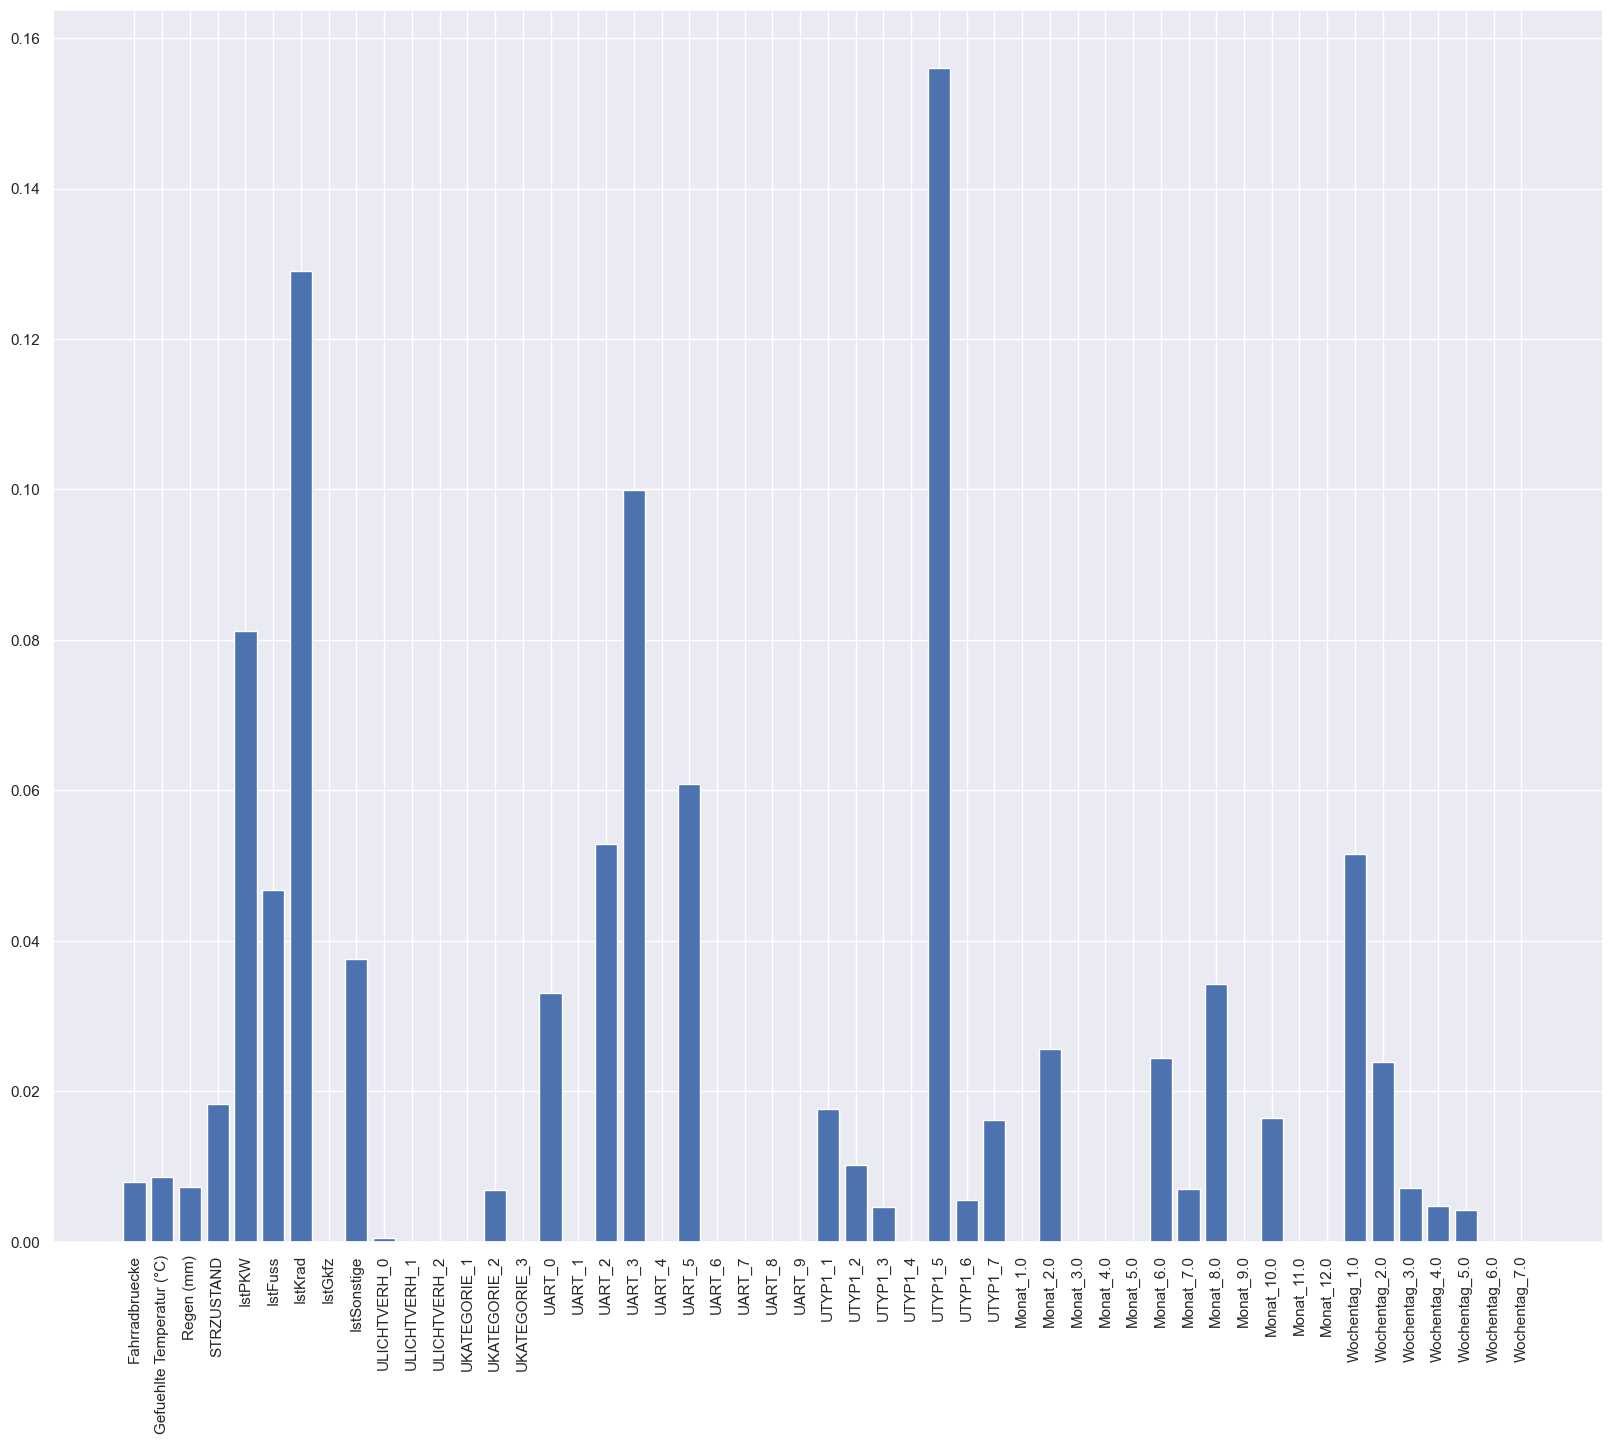

In [22]:
plt.figure(figsize=(20,16))
plt.bar(x.columns, model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

However, when we plotted the feature importances of the model, we can clearly see that UTYPE1_5 (Accident caused by stationary traffic) has the highest importance for diverting the deviation.

## What is the general distribution of traffic accidents over the city? Where are the tricky spots for the bike user?

In [23]:
import plotly.io as pio
import plotly.express as px

pio.renderers.default = "notebook"

location_data=df1_df2_merged[["IstRad","XGCSWGS84","YGCSWGS84","Fahrradbruecke"]]

location_data["XGCSWGS84"]=location_data["XGCSWGS84"].str.replace(',','.')
location_data["YGCSWGS84"]=location_data["YGCSWGS84"].str.replace(',','.')
location_data["XGCSWGS84"] = location_data["XGCSWGS84"].astype(float)
location_data["YGCSWGS84"] = location_data["YGCSWGS84"].astype(float)



fig = px.scatter_mapbox(location_data, 
                        lat="YGCSWGS84", 
                        lon="XGCSWGS84", 
                        zoom=5,
                        color="IstRad",
                        size="Fahrradbruecke",
                        height=800,
                        width=1200)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Temp\ipykernel_59756\2881388844.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Temp\ipykernel_59756\2881388844.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Temp\ipykernel_59756\2881388844.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Tem

As the map of the accident locations demonstrated, the accidents had happened at various locations but mostly in the centre of the Konstanz. 

The first remark would be, especially at the exit of the bicycle bridge is a potential accident locations for the bikes. 
The second one, the main roads and highways can be dangerous for bike riders. 
The third one, the traffic on the "Hafenstraße" (by the bay of Konstanz side) caused 6 different accidents in a year.
The last one, the nested traffic particullarly at rotary intersections in the city threaten the bikers.

# Conclusion

- There is no notable effect of the bike count in the flow on the bike involved accidents. And there is no significant correlation between.
- 9 AM, 15 PM and 18 PM are critical hours in the day for the bike users. And July is a bad month for all drivers.
- Weather types are not quite correlated with the bike count.
- There are some challenges spots inside the city that bike riders should take into account.
- For predicting bike counts, sklearn.linearregression whilst for the bike involved accidents xgboost classifier is the best method.
